# Yêu cầu 2

## Đọc dữ liệu đầu vào

In [19]:
import pandas as pd

In [20]:
path = "/Users/quockhoile/Desktop/DaiHoc/Cac Mo hinh DL/milestone/code/data_process/cleaned_data/df_revenue_clean.csv"
data_clean = pd.read_csv(path)

data_clean.head(10)

/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_87252/3238735070.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data_clean = pd.read_csv(path)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Day,Hour,DayOfWeek,MonthYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,8,2,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,8,2,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,8,2,2010-12
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010,12,1,8,2,2010-12
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010,12,1,8,2,2010-12
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,8,2,2010-12
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010,12,1,8,2,2010-12
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010,12,1,8,2,2010-12


## Doanh thu

### Daily


Thời gian bắt đầu: 2010-12-01 08:26:00
Thời gian kết thúc: 2011-12-09 12:50:00

Daily Revenue (Head):
InvoiceDate
2010-12-01    58776.79
2010-12-02    47629.42
2010-12-03    46898.63
2010-12-04        0.00
2010-12-05    31364.63
Freq: D, Name: TotalAmount, dtype: float64


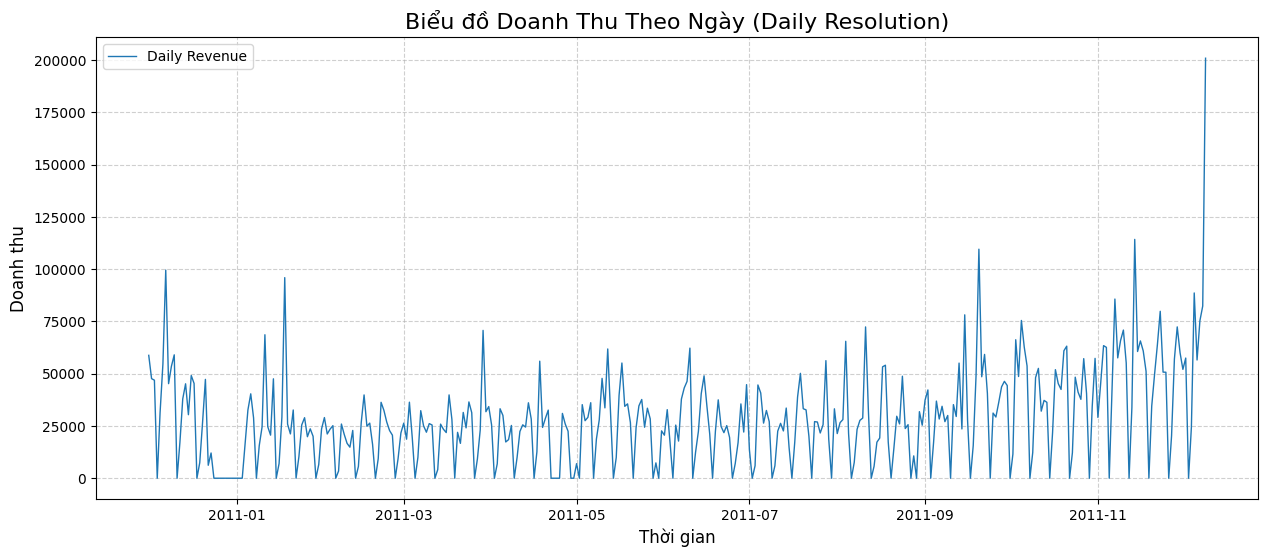

In [21]:
# Chuyển đổi cột InvoiceDate sang định dạng datetime
data_clean['InvoiceDate'] = pd.to_datetime(data_clean['InvoiceDate'])

# Kiểm tra khoảng thời gian của dữ liệu
print(f"Thời gian bắt đầu: {data_clean['InvoiceDate'].min()}")
print(f"Thời gian kết thúc: {data_clean['InvoiceDate'].max()}")

# 1. Xây dựng chuỗi thời gian theo ngày (Daily)
# Resample theo ngày ('D') và tính tổng doanh thu
daily_revenue = data_clean.set_index('InvoiceDate').resample('D')['TotalAmount'].sum()

# Hiển thị 5 dòng đầu
print("\nDaily Revenue (Head):")
print(daily_revenue.head())

# Trực quan hóa Daily Revenue
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
plt.plot(daily_revenue.index, daily_revenue.values, label='Daily Revenue', color='#1f77b4', linewidth=1)
plt.title('Biểu đồ Doanh Thu Theo Ngày (Daily Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Monthly

Monthly Revenue:
InvoiceDate
2010-12-01     821452.730
2011-01-01     689811.610
2011-02-01     522545.560
2011-03-01     716215.260
2011-04-01     536968.491
2011-05-01     769296.610
2011-06-01     760547.010
2011-07-01     718076.121
2011-08-01     757841.380
2011-09-01    1056435.192
2011-10-01    1151263.730
2011-11-01    1503866.780
2011-12-01     637790.330
Freq: MS, Name: TotalAmount, dtype: float64


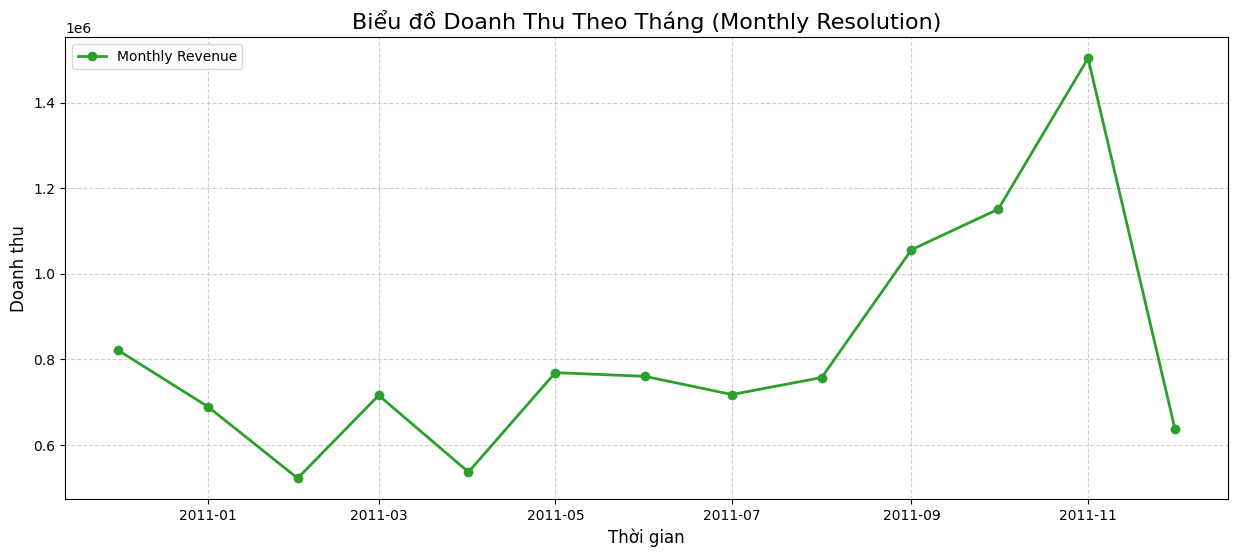

In [22]:
# 2. Xây dựng chuỗi thời gian theo tháng (Monthly)
# Resample theo tháng ('MS' - Month Start) để điểm dữ liệu nằm ở đầu tháng
monthly_revenue = data_clean.set_index('InvoiceDate').resample('MS')['TotalAmount'].sum()

# Hiển thị dữ liệu
print("Monthly Revenue:")
print(monthly_revenue)

# Trực quan hóa Monthly Revenue
plt.figure(figsize=(15, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, label='Monthly Revenue', color='#2ca02c', marker='o', linewidth=2)
plt.title('Biểu đồ Doanh Thu Theo Tháng (Monthly Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Lập luận lựa chọn độ phân giải (Resolution Selection)

**1. Daily Resolution (Độ phân giải theo ngày):**
*   **Đặc điểm:** Dữ liệu biến động mạnh, nhiều nhiễu (noise).
*   **Mục đích:** Giúp quan sát các biến động ngắn hạn, ảnh hưởng của các sự kiện cụ thể (ví dụ: ngày lễ, khuyến mãi ngắn hạn), và phát hiện các điểm bất thường (outliers) chi tiết.
*   **Hạn chế:** Khó nhìn thấy xu hướng dài hạn do độ nhiễu cao (high frequency fluctuations).

**2. Monthly Resolution (Độ phân giải theo tháng):**
*   **Đặc điểm:** Dữ liệu mượt mà hơn, loại bỏ được các biến động trong tuần (weekly seasonality).
*   **Mục đích:** Phù hợp để phân tích xu hướng dài hạn (Trend) và tính mùa vụ hàng năm (Yearly Seasonality). Đây là độ phân giải tốt cho việc ra quyết định chiến lược ở cấp quản lý.
*   **Hạn chế:** Mất đi thông tin chi tiết về các biến động ngắn hạn.

**Kết luận:**
Để phân tích toàn diện, chúng ta sẽ sử dụng kết hợp cả hai:
*   **Monthly** để xác định Trend và Seasonality chính.
*   **Daily** để đi sâu vào phân tích các biến động bất thường (Irregularity) và chi tiết hành vi trong các dịp đặc biệt.

## Number of Orders

## Số lượng đơn hàng (Number of Orders)

### Daily

Daily Orders (Head):
InvoiceDate
2010-12-01    127
2010-12-02    142
2010-12-03     68
2010-12-04      0
2010-12-05     88
Freq: D, Name: InvoiceNo, dtype: int64


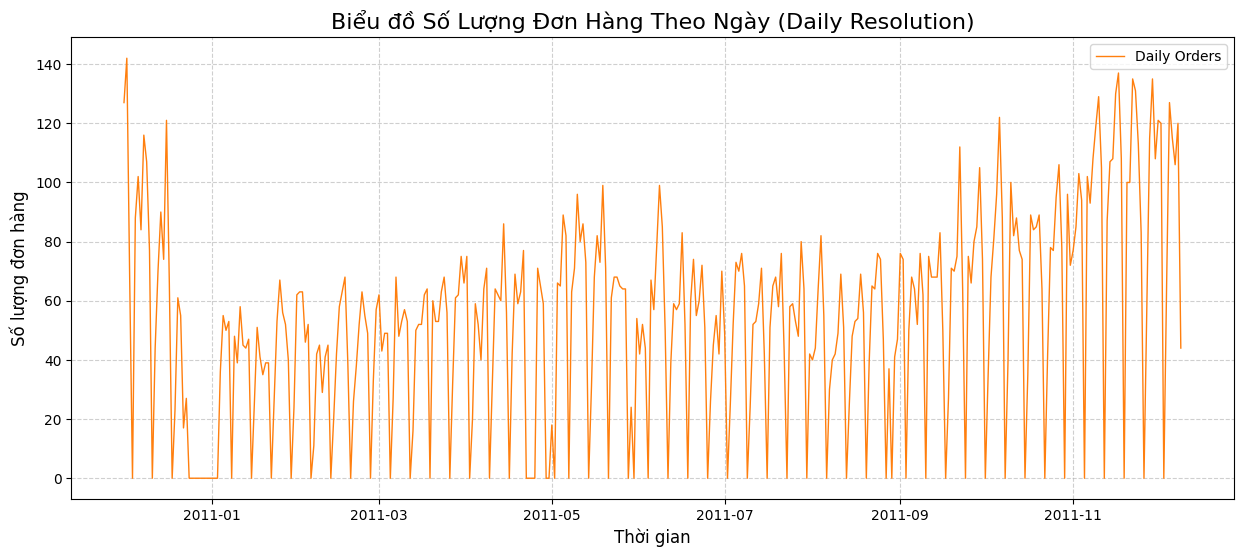

In [23]:
# 1. Xây dựng chuỗi thời gian số lượng đơn hàng theo ngày (Daily)
# Resample theo ngày ('D') và đếm số lượng InvoiceNo duy nhất
daily_orders = data_clean.set_index('InvoiceDate').resample('D')['InvoiceNo'].nunique()

# Hiển thị 5 dòng đầu
print("Daily Orders (Head):")
print(daily_orders.head())

# Trực quan hóa Daily Orders
plt.figure(figsize=(15, 6))
plt.plot(daily_orders.index, daily_orders.values, label='Daily Orders', color='#ff7f0e', linewidth=1)
plt.title('Biểu đồ Số Lượng Đơn Hàng Theo Ngày (Daily Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Monthly

Monthly Orders:
InvoiceDate
2010-12-01    1559
2011-01-01    1086
2011-02-01    1100
2011-03-01    1454
2011-04-01    1246
2011-05-01    1681
2011-06-01    1533
2011-07-01    1476
2011-08-01    1361
2011-09-01    1838
2011-10-01    2040
2011-11-01    2769
2011-12-01     819
Freq: MS, Name: InvoiceNo, dtype: int64


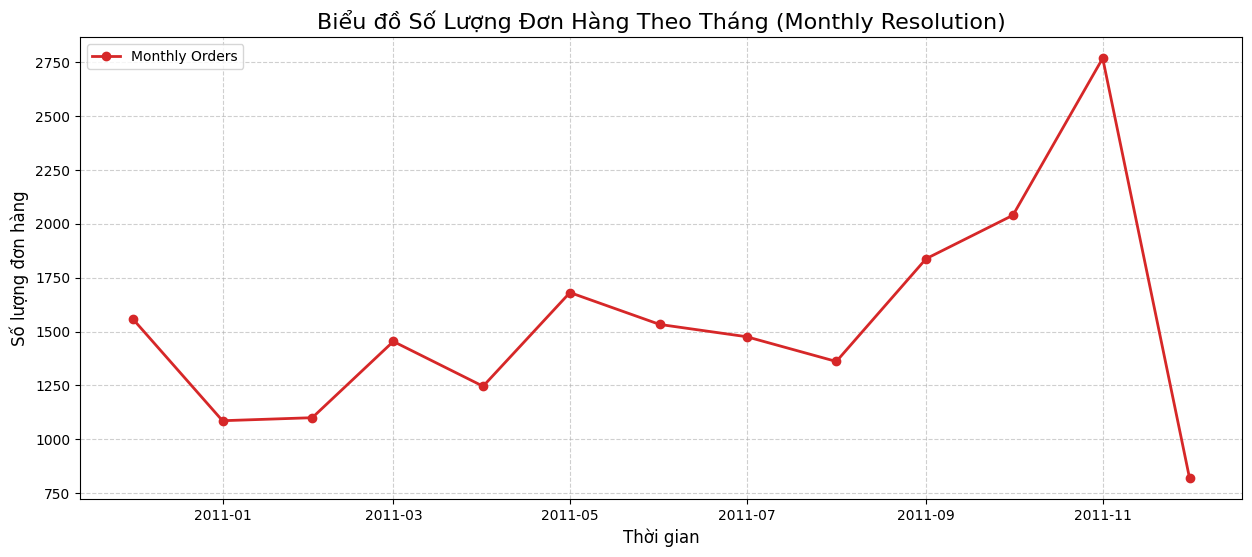

In [24]:
# 2. Xây dựng chuỗi thời gian số lượng đơn hàng theo tháng (Monthly)
# Resample theo tháng ('MS' - Month Start) để điểm dữ liệu nằm ở đầu tháng
monthly_orders = data_clean.set_index('InvoiceDate').resample('MS')['InvoiceNo'].nunique()

# Hiển thị dữ liệu
print("Monthly Orders:")
print(monthly_orders)

# Trực quan hóa Monthly Orders
plt.figure(figsize=(15, 6))
plt.plot(monthly_orders.index, monthly_orders.values, label='Monthly Orders', color='#d62728', marker='o', linewidth=2)
plt.title('Biểu đồ Số Lượng Đơn Hàng Theo Tháng (Monthly Resolution)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Yêu cầu 3: Trực quan hóa và Moving Average
Nhiệm vụ:
- Trực quan hóa chuỗi thời gian
- Áp dụng Moving Average (ít nhất 2 window size khác nhau)
- Aggregate mỗi chuỗi: Daily, Monthly
- Vẽ line plot

## 1. Phân tích Doanh thu (Revenue) với Moving Average

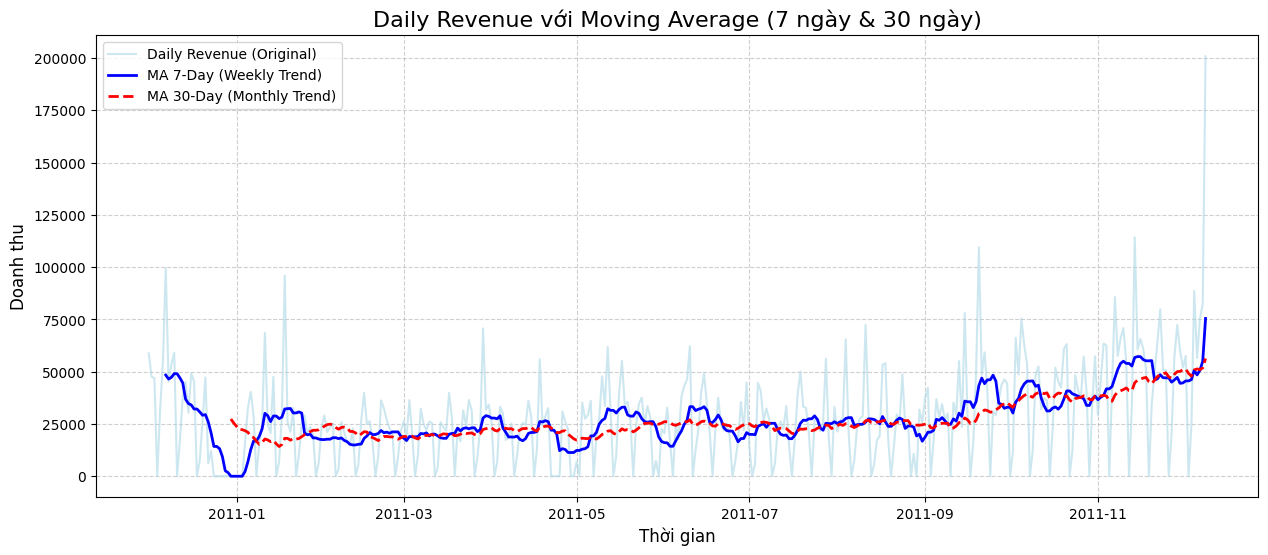

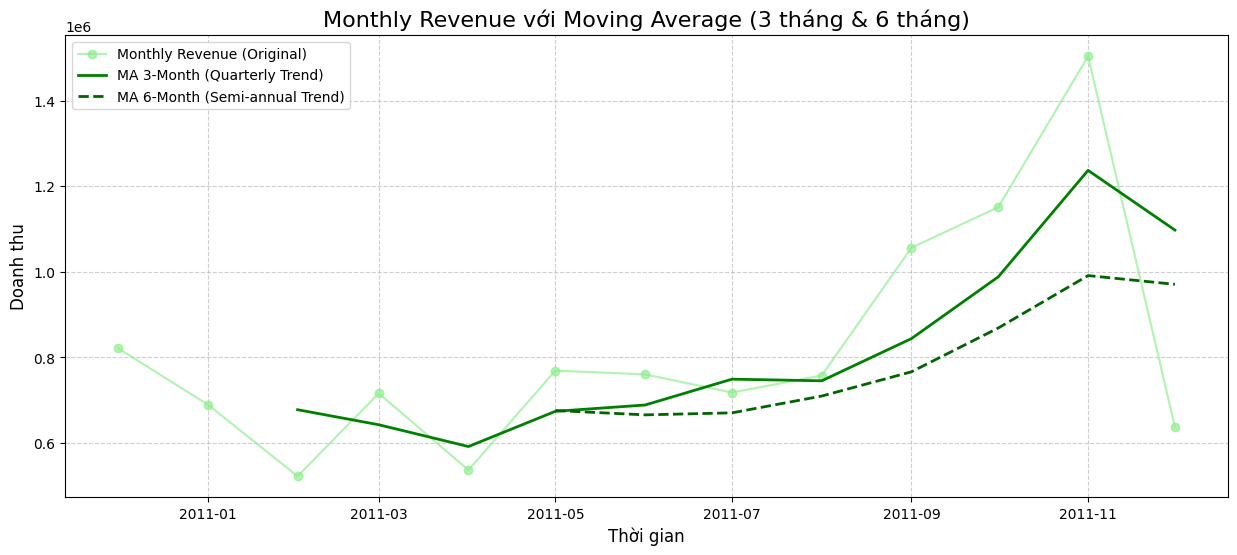

In [27]:
# --- DAILY REVENUE ---
# Tính Moving Average cho Daily Revenue
# Window 7: Xu hướng tuần (Weekly Trend)
# Window 30: Xu hướng tháng (Monthly Trend)
daily_revenue_ma7 = daily_revenue.rolling(window=7).mean()
daily_revenue_ma30 = daily_revenue.rolling(window=30).mean()

# Vẽ biểu đồ Daily Revenue với MA
plt.figure(figsize=(15, 6))
plt.plot(daily_revenue.index, daily_revenue.values, label='Daily Revenue (Original)', color='lightblue', alpha=0.6)
plt.plot(daily_revenue_ma7.index, daily_revenue_ma7.values, label='MA 7-Day (Weekly Trend)', color='blue', linewidth=2)
plt.plot(daily_revenue_ma30.index, daily_revenue_ma30.values, label='MA 30-Day (Monthly Trend)', color='red', linewidth=2, linestyle='--')

plt.title('Daily Revenue với Moving Average (7 ngày & 30 ngày)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- MONTHLY REVENUE ---
# Tính Moving Average cho Monthly Revenue
# Window 3: Xu hướng quý (Quarterly Trend)
# Window 6: Xu hướng nửa năm (Semi-annual Trend)
monthly_revenue_ma3 = monthly_revenue.rolling(window=3).mean()
monthly_revenue_ma6 = monthly_revenue.rolling(window=6).mean()

# Vẽ biểu đồ Monthly Revenue với MA
plt.figure(figsize=(15, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, label='Monthly Revenue (Original)', color='lightgreen', marker='o', alpha=0.7)
plt.plot(monthly_revenue_ma3.index, monthly_revenue_ma3.values, label='MA 3-Month (Quarterly Trend)', color='green', linewidth=2)
plt.plot(monthly_revenue_ma6.index, monthly_revenue_ma6.values, label='MA 6-Month (Semi-annual Trend)', color='darkgreen', linewidth=2, linestyle='--')

plt.title('Monthly Revenue với Moving Average (3 tháng & 6 tháng)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 2. Phân tích Số lượng đơn hàng (Number of Orders) với Moving Average

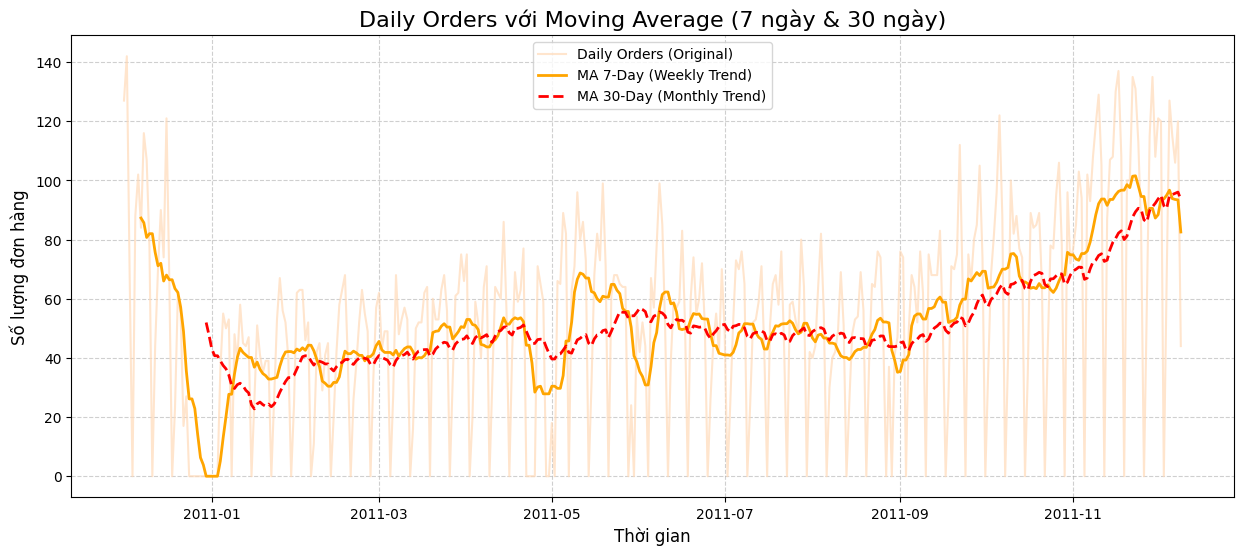

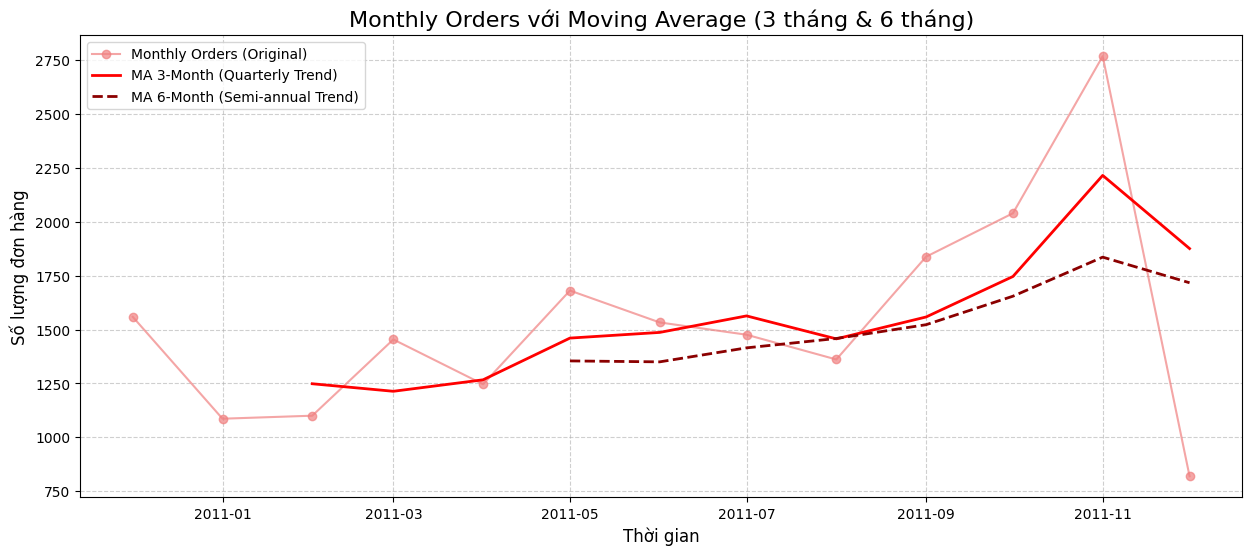

In [28]:
# --- DAILY ORDERS ---
# Tính Moving Average cho Daily Orders
daily_orders_ma7 = daily_orders.rolling(window=7).mean()
daily_orders_ma30 = daily_orders.rolling(window=30).mean()

# Vẽ biểu đồ Daily Orders với MA
plt.figure(figsize=(15, 6))
plt.plot(daily_orders.index, daily_orders.values, label='Daily Orders (Original)', color='peachpuff', alpha=0.7)
plt.plot(daily_orders_ma7.index, daily_orders_ma7.values, label='MA 7-Day (Weekly Trend)', color='orange', linewidth=2)
plt.plot(daily_orders_ma30.index, daily_orders_ma30.values, label='MA 30-Day (Monthly Trend)', color='red', linewidth=2, linestyle='--')

plt.title('Daily Orders với Moving Average (7 ngày & 30 ngày)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- MONTHLY ORDERS ---
# Tính Moving Average cho Monthly Orders
monthly_orders_ma3 = monthly_orders.rolling(window=3).mean()
monthly_orders_ma6 = monthly_orders.rolling(window=6).mean()

# Vẽ biểu đồ Monthly Orders với MA
plt.figure(figsize=(15, 6))
plt.plot(monthly_orders.index, monthly_orders.values, label='Monthly Orders (Original)', color='lightcoral', marker='o', alpha=0.7)
plt.plot(monthly_orders_ma3.index, monthly_orders_ma3.values, label='MA 3-Month (Quarterly Trend)', color='red', linewidth=2)
plt.plot(monthly_orders_ma6.index, monthly_orders_ma6.values, label='MA 6-Month (Semi-annual Trend)', color='darkred', linewidth=2, linestyle='--')

plt.title('Monthly Orders với Moving Average (3 tháng & 6 tháng)', fontsize=16)
plt.xlabel('Thời gian', fontsize=12)
plt.ylabel('Số lượng đơn hàng', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Yêu cầu 4: Phân tích Mùa vụ (Seasonality Analysis)
Nhiệm vụ:
- Phân tích mùa vụ theo: Tháng trong năm, Ngày trong tuần
- So sánh seasonality ở các cấp độ thời gian khác nhau

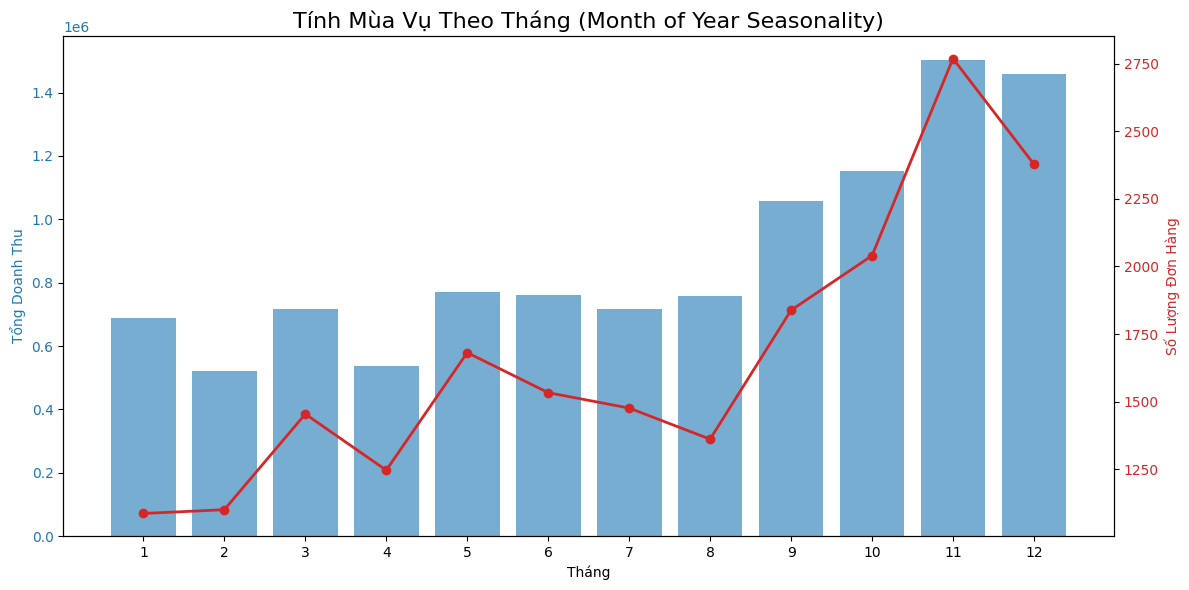

In [36]:
# Chuẩn bị dữ liệu cho phân tích mùa vụ
# Tạo thêm cột Month và DayOfWeek từ InvoiceDate
data_clean['Month'] = data_clean['InvoiceDate'].dt.month
data_clean['DayOfWeek'] = data_clean['InvoiceDate'].dt.day_name()
data_clean['DayOfWeekIndex'] = data_clean['InvoiceDate'].dt.dayofweek

# 1. Phân tích theo Tháng trong năm (Month of Year)
# Tính trung bình doanh thu và số đơn hàng theo tháng
# Lưu ý: Dữ liệu chỉ có khoảng 1 năm, nên việc group by Month chủ yếu phản ánh trend của năm đó
monthly_seasonality = data_clean.groupby('Month').agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

# Vẽ Doanh thu
color = 'tab:blue'
ax1.set_xlabel('Tháng')
ax1.set_ylabel('Tổng Doanh Thu', color=color)
ax1.bar(monthly_seasonality['Month'], monthly_seasonality['TotalAmount'], color=color, alpha=0.6, label='Revenue')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(1, 13))

# Vẽ Số đơn hàng (trục 2)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Số Lượng Đơn Hàng', color=color)
ax2.plot(monthly_seasonality['Month'], monthly_seasonality['InvoiceNo'], color=color, marker='o', linewidth=2, label='Orders')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Tính Mùa Vụ Theo Tháng (Month of Year Seasonality)', fontsize=16)
fig.tight_layout()
plt.show()

/var/folders/0w/lyp5nttn3qng2dxl7wr_hd700000gn/T/ipykernel_87252/3570886586.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=daily_data, x='DayOfWeek', y='TotalAmount', order=days_order, palette='Set2')


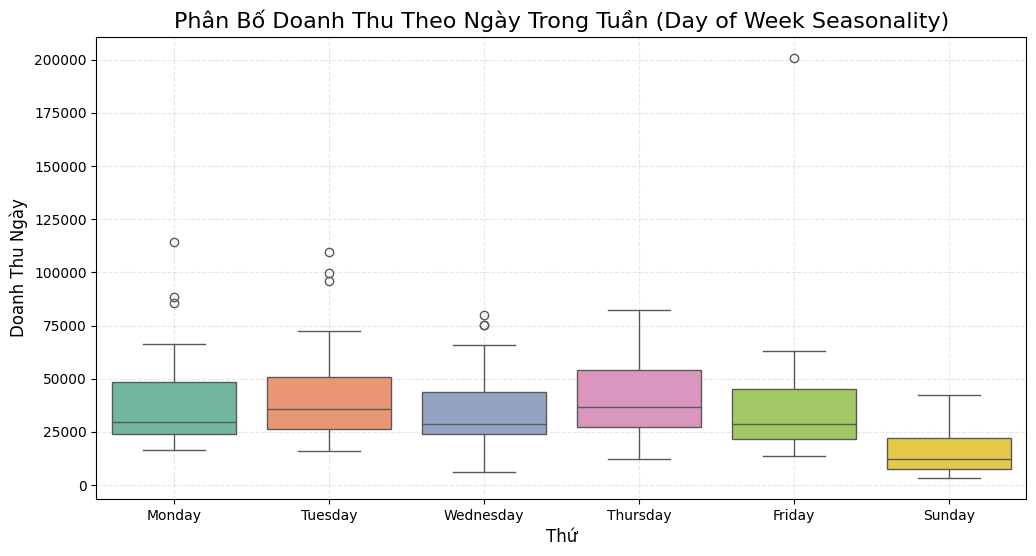

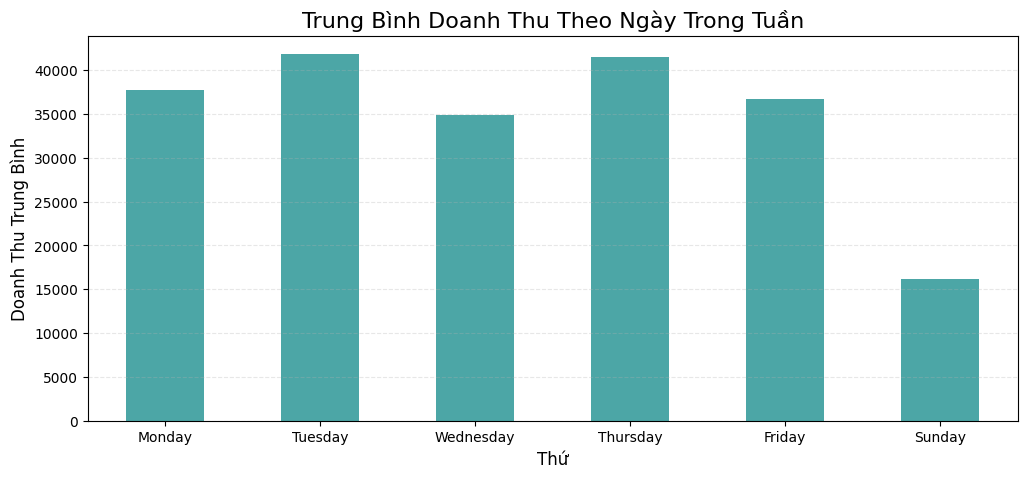

In [35]:
# 2. Phân tích theo Ngày trong tuần (Day of Week)
# Sắp xếp thứ tự ngày trong tuần
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'] 
# Lưu ý: Dataset này thường không có dữ liệu thứ 7 (Saturday)

# Tính trung bình doanh thu theo ngày trong tuần (để so sánh công bằng giữa các ngày)
# Group theo ngày cụ thể trước (Daily), sau đó mới group theo thứ
daily_data = data_clean.groupby(data_clean['InvoiceDate'].dt.date).agg({
    'TotalAmount': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()
daily_data['InvoiceDate'] = pd.to_datetime(daily_data['InvoiceDate'])
daily_data['DayOfWeek'] = daily_data['InvoiceDate'].dt.day_name()


# Vẽ Boxplot để thấy sự phân bố (biến động) của doanh thu theo thứ
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_data, x='DayOfWeek', y='TotalAmount', order=days_order, palette='Set2')
plt.title('Phân Bố Doanh Thu Theo Ngày Trong Tuần (Day of Week Seasonality)', fontsize=16)
plt.xlabel('Thứ', fontsize=12)
plt.ylabel('Doanh Thu Ngày', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Vẽ Barplot tổng quan trung bình
dow_seasonality = daily_data.groupby('DayOfWeek')['TotalAmount'].mean().reindex(days_order)

plt.figure(figsize=(12, 5))
dow_seasonality.plot(kind='bar', color='teal', alpha=0.7)
plt.title('Trung Bình Doanh Thu Theo Ngày Trong Tuần', fontsize=16)
plt.xlabel('Thứ', fontsize=12)
plt.ylabel('Doanh Thu Trung Bình', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### Nhận xét và So sánh Seasonality

**1. Theo Tháng (Monthly Seasonality):**
*   **Quan sát:** Doanh thu và số lượng đơn hàng có xu hướng tăng mạnh vào các tháng cuối năm (Tháng 9, 10, 11). Tháng 11 thường là đỉnh điểm do các sự kiện mua sắm lớn (Black Friday, chuẩn bị Giáng sinh).
*   **Đặc điểm:** Chu kỳ dài hạn, gắn liền với hành vi tiêu dùng theo mùa lễ hội.

**2. Theo Ngày trong tuần (Day of Week Seasonality):**
*   **Quan sát:** (Dựa trên biểu đồ) Thường Thứ 5 (Thursday) hoặc Thứ 3 (Tuesday) có thể có doanh thu cao. Thứ 7 (Saturday) thường không có giao dịch (do đặc thù vận hành của dataset này). Chủ nhật (Sunday) thường thấp hơn các ngày trong tuần.
*   **Đặc điểm:** Chu kỳ ngắn hạn, lặp lại hàng tuần. Phản ánh thói quen làm việc và mua sắm của khách hàng (thường mua trong giờ hành chính hoặc ngày thường).

**So sánh:**
*   **Monthly Seasonality** có biên độ dao động lớn hơn và ảnh hưởng mạnh mẽ đến tổng doanh thu năm (Strategic Level).
*   **Weekly Seasonality** ổn định hơn và giúp tối ưu hóa vận hành hàng ngày (Operational Level) như bố trí nhân sự, kho bãi.